<a href="https://colab.research.google.com/github/gn0262487838/DL_note/blob/master/simple_cnn_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[[[ 90 106 128]
  [100 115 140]
  [ 88 103 129]
  ...
  [139 144 163]
  [116 126 137]
  [ 98 106 109]]

 [[ 88 103 126]
  [ 97 115 138]
  [ 84 103 126]
  ...
  [156 162 175]
  [157 168 181]
  [130 139 150]]

 [[ 85  99 125]
  [ 95 113 138]
  [ 81 100 122]
  ...
  [122 127 137]
  [116 126 136]
  [123 132 146]]

 ...

 [[233 216 196]
  [234 217 197]
  [235 217 197]
  ...
  [232 217 196]
  [237 219 203]
  [236 221 208]]

 [[231 214 195]
  [231 214 195]
  [234 217 198]
  ...
  [205 192 172]
  [216 199 183]
  [218 203 188]]

 [[229 214 195]
  [230 215 196]
  [235 219 200]
  ...
  [194 181 162]
  [197 180 163]
  [205 189 172]]]
汽車


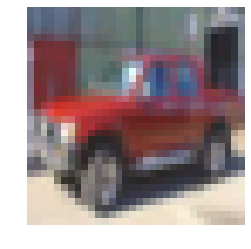

In [0]:
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
c = random.randint(0,x_train.shape[0] - 1)
plt.axis("off")
# 因圖像具有RGB，故dataframe無法使用。
print(x_train[c])

# y_train[c]出來的答案是類別list，為了以後可以擴充，因為一張圖不會只有一個物體。
trans = ["飛機","汽車","鳥","貓","鹿","狗","青蛙","馬","船","卡車"]
print(trans[y_train[c][0]])
# take a look
plt.imshow(x_train[c])

In [0]:
# normalize-data
x_train_shape = x_train / 255.0
x_test_shape = x_test / 255.0
print(x_train_shape)


[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [0]:
# one-hot encoding
from keras.utils.np_utils import to_categorical

y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)
# take a look
print("原來:",y_train[0])
print("後來:",y_train_cate[0])

原來: [6]
後來: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# building
from keras.models import Sequential
# Flatten功能為攤平。
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

cnn = Sequential()
# (3 * 3)(一個過濾) * 3(RGB) * 32(filter) + 32(bias) = 896
cnn.add(Conv2D(
    32, (3, 3),
    padding = "same", # 圖像外加一圈
    activation = "relu",
    input_shape = (32, 32, 3)
))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (3 * 3)(一個過濾) * 32(特徵) * 64(filter) + 64(bias) = 18496
cnn.add(Conv2D(
    64, (3, 3),
    padding = "same", # 圖像外加一圈
    activation = "relu",
))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (3 * 3)(一個過濾) * 64(特徵) * 128(filter) + 128(bias) = 73856
cnn.add(Conv2D(
    128, (3, 3),
    padding = "same", # 圖像外加一圈
    activation = "relu",
))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (3 * 3)(一個過濾) * 128(特徵) * 256(filter) + 256(bias) = 295168
cnn.add(Conv2D(
    256, (3, 3),
    padding = "same", # 圖像外加一圈
    activation = "relu",
))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation="relu"))
cnn.add(Dense(10,activation="softmax"))
cnn.summary()

W0831 16:02:54.051460 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 16:02:54.096335 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 16:02:54.103874 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 16:02:54.145545 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

In [0]:
# check
cnn.compile(
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = "adam"
)

W0831 16:02:54.252239 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0831 16:02:54.284263 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# training
cnn.fit(
   x_train_shape,
   y_train_cate,
   batch_size=200,
   epochs=10, 
   validation_split=0.1
)

W0831 16:02:54.516766 139924671887232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0831 16:02:54.605082 139924671887232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 14s 306us/step - loss: 1.6672 - acc: 0.3882 - val_loss: 1.3509 - val_acc: 0.5068
Epoch 2/10
45000/45000 [==============================] - 7s 156us/step - loss: 1.2564 - acc: 0.5505 - val_loss: 1.1465 - val_acc: 0.5916
Epoch 3/10
45000/45000 [==============================] - 7s 156us/step - loss: 1.0559 - acc: 0.6248 - val_loss: 0.9975 - val_acc: 0.6480
Epoch 4/10
45000/45000 [==============================] - 7s 157us/step - loss: 0.9226 - acc: 0.6754 - val_loss: 0.9236 - val_acc: 0.6728
Epoch 5/10
45000/45000 [==============================] - 7s 157us/step - loss: 0.8349 - acc: 0.7093 - val_loss: 0.8680 - val_acc: 0.7054
Epoch 6/10
45000/45000 [==============================] - 7s 156us/step - loss: 0.7421 - acc: 0.7410 - val_loss: 0.7860 - val_acc: 0.7328
Epoch 7/10
45000/45000 [==============================] - 7s 157us/step - loss: 0.6712 - acc: 0.7666 - val_loss: 0.7948 - 

In [0]:
# 評估
cnn.evaluate(x_test_shape,y_test_cate)

10000/10000 [==============================] - 1s 127us/step


[0.8219480524063111, 0.7355]

In [0]:
# 測試
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,792,17,24,23,20,10,12,15,29,58
1,14,871,3,9,3,5,4,5,7,79
2,67,7,544,94,109,60,53,49,7,10
3,14,8,36,610,64,147,46,44,4,27
4,16,4,37,63,739,34,34,66,5,2
5,8,7,21,217,44,610,21,59,2,11
6,4,4,27,64,40,27,808,10,6,10
7,12,4,16,49,44,38,6,818,1,12
8,102,41,11,27,11,11,7,7,726,57
9,24,73,8,16,0,9,7,15,11,837


(10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[3 8 8 ... 5 1 7]
(10000,)
[   1    2   17 ... 9995 9996 9998]


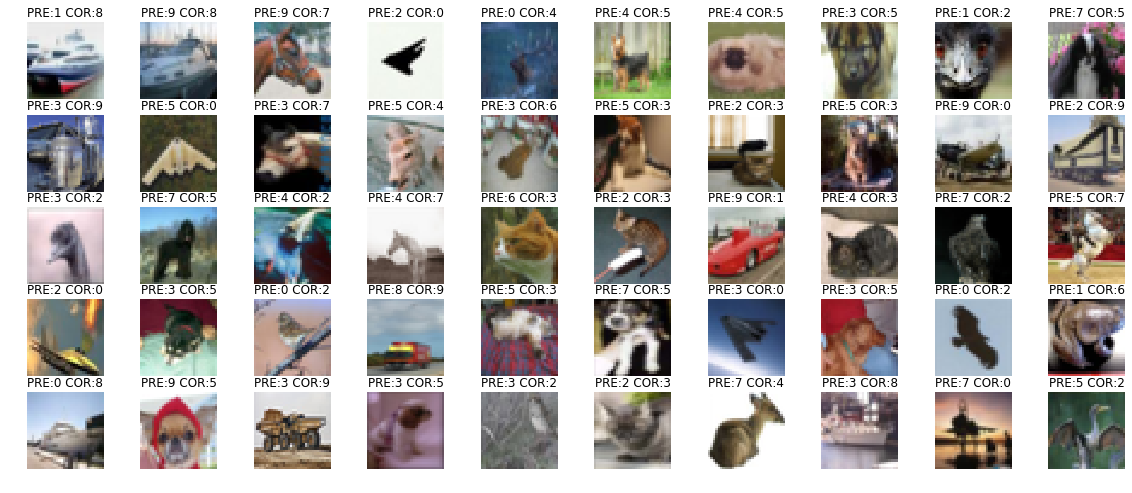

In [0]:
# graph
import numpy as np
# 維度不同不可以一起比較!!!
diff = np.nonzero(pre != y_test.reshape(10000))[0]
print(y_test.shape)
print(y_test)
print(y_test.reshape(10000))
print(pre.shape)
print(diff)
# 預測錯誤的圖的正確答案。
origin = y_test.reshape(10000)[diff]
# 預測錯誤的圖的錯誤答案。
fal = pre[diff]
# 把圖取出來
photo = x_test[diff]

plt.figure(figsize=(20,450))

width = 10
height = int(len(photo) / 10) + 1
# 圖太多，只印前100個。
for (i,j) in enumerate(photo[0:50]):
    # 列數,行數, 第幾張圖(i開始)
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "PRE:" + str(fal[i]) + " COR:" + str(origin[i])
    plt.title(t)
    plt.imshow(j, cmap="gray")

In [0]:
'''
# 儲存模型
cnn.save("drive/Shared drives/Colab/DL_text/simple_cnn.h5")
'''